## Procesamiento de Lenguaje Natural con Python

### Profesor: José Incio, Ph.D
#### Departamento de Ciencias Sociales - Sociología
- correo: jincio@pucp.pe
- web: www.joseincio.com

## Objetivos de esta sesión

- Seguimos con TOKENS!
    - Comprender la diferencia entre token y término.
    - Comprender ventajas y desventajas del pre-procesamiento de los datos
- Revisaremos la idea de List Comprehension!
- Herramientas de procesamiento
  - Expresiones regulares
  - Stopwords
- Un tour por Pandas
- ¿De dónde saco la información?

## Tokenización - Continuación

**Recordemos**

- El lenguaje es complejo.
    - Muchos niveles
    - Es anidado (las palabras pueden estar 'amarradas' entre sí)
    - Una palabra puede tener muchos significados


"En nuestra clase vamos a ver muchas herramientas que nos permitan trabajar el texto como dato. Este curso es parte de la oferta de cursos multidisciplinario de CSS-PUCP el curso lo dictará José Incio. Jose Incio es doctor en Ciencias política por la universidad de Pittsburgh y le gusta mucho star treck pero no se considera un trekie. La clase es presencial y es una clase teórico-práctica. José está muy contento de dictar esta clase 😄"

- En este texto podemos estar tentados a decir que un token es una palabra. 💬

*Pero* ¿qué es una palabra?
- Que hacemos con las palabras compuestas o palabras inventadas como .. trekie. 🤓
- José Incio es diferente de José, o Jose
- Contento .. 😄

In [1]:
import os
from google.colab import drive
!pip install unidecode
import unidecode
import matplotlib.pyplot as plt
from wordcloud import WordCloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 5.4 MB/s eta 0:00:00


- Para poder analizar texto, o convertir texto a datos nos enfocaremos en la composición MORFOLÓGICA de las palabras. NO en la syntaxis (función de la palabra) o semántica (contenido)

In [2]:
import unidecode

In [4]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [5]:
#os.chdir("/content/drive/MyDrive/CursosD/TalleresExtension/QLAB_2023")
os.chdir("/content/drive/MyDrive/QLAB_2023")

In [6]:
from DO.content_functions import *

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


¿Qué pasó ahí?
- Cuando trabajamos con texto y, en general, en nuestros proyectos es posible que creemos funciones propias para tareas específicas u orientadas a nuestros proyectos.
- Puede ser desordenado ponerlas dentro del mismo file, así que LAS LLAMAMOS las funciones, clases o incluso variables que hayamos definido en este file
- Es equivalente a importar el módulo content_functions (file específico)dentro del paquete DO (archivo)

## Homogenizando el texto

In [ ]:
def tokenEspacioBlanco(doc):
    '''Tokeniza un texto usando la regla: "separar espacio en blanco"
      input:
        doc: es un solo string
      output:
        una lista de strings
    '''
    return doc.split()

def lowerIt(tokenList):
    '''Lower case all tokens,
      input:
        tokenList: list of tokens
      output:
        a list of lower case tokens
    '''
    return [i.lower() for i in tokenList]

In [ ]:
with open(file="mensajepresidencialVP.txt", mode="r") as f:
    mensaje1=f.read()

In [ ]:
limpieza_1 = lowerIt(tokenEspacioBlanco(mensaje1))

In [ ]:
unique_string=(" ").join(limpieza_1)

In [ ]:
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)

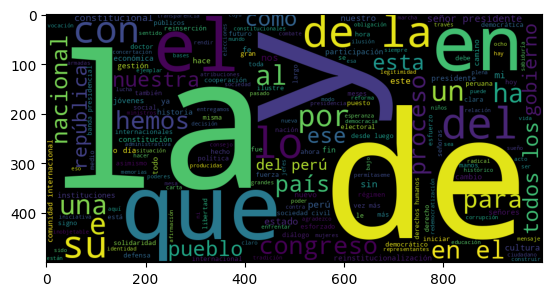

In [ ]:
plt.imshow(wordcloud)

### No nos dice practicamente nada del texto, a pesar de haber utilizado funciones de limpieza!!!
#### Es necesario complejizarlas, pero también adaptarlas a nuestro texto.

## Hacemos algo un poco más complejo...

In [ ]:
def removePunctuation(string):
    punctList = [",","\\.",";","-","'",'"',"!","`","'"]
    for item in punctList:
        string = re.sub(item, "", string)
    return string

def removetildes(string):
    list1 = ["á","é","í","ó","ú"]
    list2 = ["a","e","i","o","u"]
    for i in range(len(list1)):
        string = string.replace(list1[i], list2[i])
    return string

#### Más adelante explicaremos a detalle lo que está sucediendo aquí paciencia!!!

In [ ]:
Limpieza_2=lowerIt(tokenEspacioBlanco(removePunctuation(removetildes(mensaje1))))
Limpieza_2 = [word for word in Limpieza_2 if word not in stop]

In [ ]:
unique_string=(" ").join(Limpieza_2)

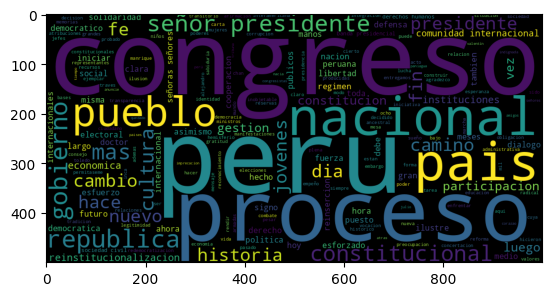

In [ ]:
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.imshow(wordcloud)

### Ahora sí es un texto medianamente interpretable
Para llegar a esto es necesario conocer algunas funciones de expresiones regulares y las poderosas stopwords!!!


# Token vs Términos

- El congresista interrumpió a otro congresista por las puras.
- El <span style="color:blue">congresista</span> interrumpió a otro <span style="color:red">congresista</span> por las puras
- Allí vemos dos tokens "congresista" que se usan distintos, pero un solo término "congresista"
- Entonces el término es una secuencia única de caracteres que forma parte de nuestro vocabulario

- Términos son una secuencia única de caracteres que conforman el vocabulario que analizaremos

- Tenemos que tener en cuenta que en este caso tenemos 836 términos que se han formado del discurso presidencial que estamos analizados.. pero no son los únicos
- Un documento nuevo puede tener términos que no están en nuestro vocabulario!!!.
- Regresaremos a esto en breve.

- Otra cosa que tenemos que darnos cuenta es que aún nuestra lista de términos puede mejorarse.

- Un término puede corresponder a múltiples tokens.. por ejemplo
- el term `estud` puede ser el término para los tokens: estudiante, estudiantes

- se puede decir que `estud` es un `termino STEM`
- Otro nombre para este proceso es`lematización`, en este caso se busca las raíces de las palabras o la raíz de las conjugaciones de los verbos
- Por ejemplo: trabajo, trabajando,trabajé, trabajó.. etc.. pueden todas corresponder al término trabajo.



y antes que digan.. "Pero la RAE..." recuerda: cada uno define los términos 😉

Algunas reglas que sirven en Ingles son:

- take `es` off the end of a word
- take `ies` off the end of a word
- take `s` off the end of a word
- take `ing` off the end of a word
- take `ly` off the end of a word

en `Español` podemos quizás elimnar los gerundios.

- Elinar `ando` `endo`

In [ ]:
def removeGeru(string):
    gerundio = ["ando","endo"]
    for item in gerundio:
        string = re.sub(item, "", string)
    return string

In [ ]:
test4 = lowerIt(tokenEspacioBlanco(removeGeru(removePunctuation(mensaje1))))

In [ ]:
print(len(set(test4)))

836


- En este caso no ayudo mucho.
- Consultar con linguista nos ayude en nuestro proceso de tokenización y construcción de vocabulario de términos.


## Debo o no debo pre-procesar los datos

- Siempre debe haber un nivel de pre-procesamiento
- Sin embargo.. hay una tensión entre especificidad y dimensionalidad

- Tener más términos únicos:
    - Mayor especificidad
    - No imponemos ni asumimos nada sobre el uso del lenguaje
    - Cuando dos tokens se refieren al mismo término tienes más confianza de que son lo mismo
    - Problema:
        - Mucha más dimensionalidad.. muchos más términos únicos.
        - Puede ser que dos token si se refieren a lo mismo y los terminas separando por diferencias morfológicas. Esto afecta al análisis ya que no permite la conexión
- Tener menos términos únicos:
    - Mayor generalidad
    - Menos dimensiones
    - Menos demanda computacional para el procesamiento de la información, etc

In [ ]:
DiccionarioDeTerminos = {}
for word in test4:
    if word in DiccionarioDeTerminos.keys():
        DiccionarioDeTerminos[word] += 1
    else:
        DiccionarioDeTerminos[word] = 1


In [ ]:
DiccionarioDeTerminos

{'mensaje': 2,
 'del': 47,
 'presidente': 11,
 'constitucional': 6,
 'perú': 12,
 'doctor': 3,
 'valentín': 1,
 'paniagua': 1,
 'corazao': 1,
 'ante': 1,
 'el': 56,
 'congreso': 11,
 'nacional': 10,
 '28': 1,
 'de': 140,
 'julio': 1,
 '2001': 1,
 'señor': 7,
 'la': 130,
 'república': 7,
 'señores': 4,
 'jefes': 2,
 'estado': 5,
 'y': 98,
 'gobierno': 5,
 'señoras': 3,
 'representantes': 2,
 'los': 42,
 'gobiernos': 2,
 'países': 1,
 'amigos': 1,
 'congresistas': 1,
 'pueblo': 6,
 'perú:': 1,
 'hace': 4,
 'ocho': 2,
 'meses': 3,
 'desde': 4,
 'esta': 8,
 'misma': 3,
 'tribuna': 1,
 'anuncié': 1,
 'que': 71,
 'nacía': 1,
 'un': 15,
 'tiempo': 1,
 'nuevo': 4,
 'atrás': 1,
 'ha': 13,
 'quedado': 1,
 'ya': 4,
 'imprecación': 1,
 'indignada': 1,
 'ese': 9,
 'nunca': 1,
 'más': 6,
 'recorrió': 1,
 'país': 10,
 'uno': 1,
 'a': 36,
 'otro': 1,
 'confín': 1,
 'ésta': 1,
 'es': 7,
 'aurora': 1,
 'no': 12,
 'pudieron': 1,
 'ver': 1,
 'ofrendaron': 1,
 'su': 21,
 'vida': 2,
 'o': 4,
 'cayeron': 1,


### Presentemos la frecuencia

In [ ]:
wordcloud = WordCloud().generate_from_frequencies(DiccionarioDeTerminos)

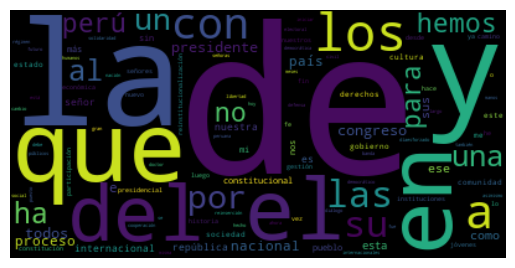

In [ ]:

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
sorted([[value, key] for key, value in DiccionarioDeTerminos.items()], reverse=True)[0:20]

[[140, 'de'],
 [130, 'la'],
 [98, 'y'],
 [71, 'que'],
 [61, 'en'],
 [56, 'el'],
 [47, 'del'],
 [42, 'los'],
 [36, 'a'],
 [29, 'con'],
 [21, 'su'],
 [21, 'las'],
 [17, 'por'],
 [15, 'un'],
 [14, 'una'],
 [14, 'al'],
 [13, 'ha'],
 [12, 'perú'],
 [12, 'para'],
 [12, 'no']]

In [ ]:
stopWords=['de','la','y','que','el', 'en','del', 'a', 'al','no', 'los']

In [ ]:
test5 = [x for x in test4 if x not in stopWords]

![](https://media.tenor.com/NFCRQV2h_kUAAAAC/what-is-going-on-the-office.gif)

# List comprenhension

- Este es un buen momento para presentarles una herramienta muy poderosas de las listas en Python: `list comprenhension`

![](https://media.tenor.com/3Wbc8FGukf8AAAAM/the-office-stay-calm.gif)

### Vamos paso a paso

`test5 = [x for x in test4 if x not in stopWords]`

- `test5=[...]` Estamos creando una lista.
- `test5=[ x....]` usamos x como una variable.
- `test5=[ x for ...]` el clásico for loop.
- `test5=[ x for x in test4....]` esta *evaluando* cada elemento de test4
- `test5=[... if x not in stopwords]` si es que x (elemento de la lista de test4) no está en la lista stopwords.

Entonces la lista 5 está comprendida por **los elementos de de test4 que NO están en stopwords


In [ ]:
nombres=['Manuel','javier', 'Javier', 'Luis', 'Lucia', 'Martín', 'Jorge', 'Nicole','Rosario' ,'Maria','Paloma', 'María']

['Martín', 'Rosario', 'Maria', 'María']

In [ ]:
nombresar=[]
for i in nombres:
    temp=re.search(r"\w*ar\w*", i)
    if temp==None:
        pass
    else:
        nombresar.append(temp.string)

print(nombresar)

['Martín', 'Rosario', 'Maria', 'María']


In [ ]:
[i for i in nombres if re.search(r"\w*ar\w*",i)]

['Martín', 'Rosario', 'Maria', 'María']

- Rehacemos nuestro wordCloud..

In [ ]:
DiccionarioDeTerminos = {}
for word in test5: ## nuestra nueva lista
    if word in DiccionarioDeTerminos.keys():
        DiccionarioDeTerminos[word] += 1
    else:
        DiccionarioDeTerminos[word] = 1

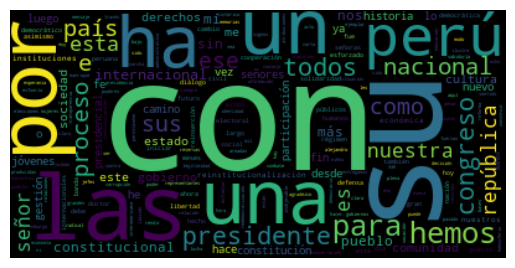

In [ ]:
wordcloud = WordCloud().generate_from_frequencies(DiccionarioDeTerminos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

A pesar de que la visualización en nubes de palabras es útil es necesario, para el NPL cambiar su formato. Actualmente utilizamos strings, lo necesitamos como dataframe...

### Una vez hemos discutido las implicancias de procesar los datos, además de aprender algunos trucos para hacerlo mejor, regresemos a las principales herramientas que nos ayudarán a procesarlo




# Expresiones regulares

- Rex es un lenguaje y lo podemos usar para encontrar patrones en `strings`
* Como todo lenguaje tiene su propia sintaxis y puede ser complicado de entender, pero existen buenas herramientas que nos ayudan con eso.
- Practiquemos: [regex101](http://www.regex101.com)

Python tiene una librería muy buena, `re` para trabajar con "expresiones regulares"


In [ ]:
import re

- re.sub : sirve para encontrar un patrón y remplazarlo por otro.
- re.search: sirve para encontrar strings en base a los patrones.


Expresiones regulares tiene varias simbolos especiales que nos ayudan a navegar por los `strings`
   - `.` cualquier bite
   - `*` es un cuantificador que se entiende como 0 o más
   - `+` es un cuantificador que se entiende como 1 o más
   - `\A` es un posicionador se lee como al inicio del `string`
   - `\s` equivale a decir espacio en blanco
   - `\w` equivale a decir caracteres dentro de una palabra
   - `\Z` es un posicionador se lee como al final del `string`
   - `[a-z]` se lee como cualquier letra entre a y z

In [ ]:
# Ejemplo
nombres=['Manuel','javier', 'Javier', 'Luis', 'Lucia', 'Martín', 'Jorge', 'Nicole','Rosario' ,'Maria','Paloma', 'María']

In [ ]:
re.search(r"\w*ar\w*", nombres[0])

In [ ]:
temp=re.search(r"\w*ar\w*", nombres[0])

In [ ]:
test=[temp]
print(test)

[None]


In [ ]:
temp=re.search(r"\w*ar\w*", nombres[5])

In [ ]:
temp

<re.Match object; span=(0, 6), match='Martín'>

In [ ]:
dir(temp)

['__class__',
 '__class_getitem__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'end',
 'endpos',
 'expand',
 'group',
 'groupdict',
 'groups',
 'lastgroup',
 'lastindex',
 'pos',
 're',
 'regs',
 'span',
 'start',
 'string']

In [ ]:
temp.string

'Martín'

In [ ]:
temp.span()

(0, 6)

In [ ]:
nombresar=[]
for i in nombres:
    temp=re.search(r"\w*ar\w*", i)
    if temp==None:
        pass
    else:
        nombresar.append(temp.string)

print(nombresar)

['Martín', 'Rosario', 'Maria', 'María']


### Regresemos a nuestro texto de prueba

In [ ]:
test1 = tokenEspacioBlanco(mensaje1)
test2 = lowerIt(tokenEspacioBlanco(mensaje1))
test3 = lowerIt(tokenEspacioBlanco(removePunctuation(mensaje1)))

In [ ]:
print(len(test1)) #Tokens
print(len(set(test1))) # Términos
print(len(set(test2))) # Términos Después de pasar los tokens de mayúsculas a minúsculas
print(len(set(test3))) # Términos eliminando puntuaciones

2145
959
918
836


# Stop words
- Como hemos visto la limpieza de datos implica un trabajo complejo.
- Es importante trabajar con herramientas que faciliten esta tarea.
- Además de rex, podemos usar listas pre-construidas de stopwords que agilicen nuestra tarea de limpiar palabras.
- Para ello podemos usar la libreria NLTK

NLTK es la librería más usada en el NLP
- En el siguiente código especificamos que queremos importar, primero, la colección corpus que tiene almacenada esta librería. "corpus" Es el módulo que almacena especificamente las listas de palabras que podemos usar.
- Luego descargamos dicha lista de palabras.
- Especificamos que trabajaremos con formas gramaticales del español
- Finalmente agregamos palabras adicionales que queramos eliminar


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
#snowballStemmer = SnowballStemmer("spanish")

stop= stopwords.words("spanish")
stop=stop+['https', 'RT', 't', 'co']
#https://github.com/xiamx/node-nltk-stopwords/blob/master/data/stopwords/spanish --> Si quieren explorar exactamente cuales son las palabras
#incluidas en esta lista las pueden checar ahí!!
# También podemos llamar al objeto "stop" para visualizarlas je

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Regresamos a nuestro primer ejemplo, nos damos cuenta de que la limpieza ha avanzado bastante luego de usar esta lista

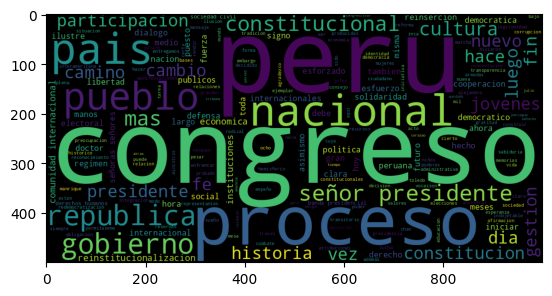

In [ ]:
Limpieza_2=lowerIt(tokenEspacioBlanco(removePunctuation(removetildes(mensaje1))))
Limpieza_2 = [word for word in Limpieza_2 if word not in stop]

unique_string=(" ").join(Limpieza_2)

wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.imshow(wordcloud)

## PANDAS!

- Pandas es un paquete que nos ayuda a trabajar y manipular 'data frames'
- Es el mejor (no único) librería de python que nos ayuda con data.frames!

![](https://miro.medium.com/max/666/1*DadyHI0auADUxl5-ft4uSQ.jpeg)

In [ ]:
import pandas as pd

`pd.Dataframe()` crea un data frame

 Métodos para importar datos

- `pd.read_csv()`  : lee archivos csv
- `pd.read_table()` : lee txt y archivos delimitados por pipe
- `pd.read_excel()`: el de toda la vida
- `pd.read_sql()`:  standard query lenguage.. si quieres ser pro con data debes aprenderlo
- `pd.read_json()`: se parecen mucho a los diccionarios.. ya lo conoceras.
- `pd.read_html ()`: lee tablas en html.
- `pd.read.stata()`: no es muy confiable pero puede funcionar.

Algunos métodos para describir rápidamente los datos
- `pd.head()` te da los primeros 6 casos
- `pd.tail()`  los últimos casos.
- `pd.describe()` medidas de descripción básicas.
- `pd.mean()` la media
- `pd.median()` la mediaan
- `pd.std()` la std.
- `pd.max()` el máximo
- `pd.min()` el mínimo

 - Iremos viendo estas y otras funciones a lo largo de las clases!!

In [ ]:
df = pd.DataFrame(DiccionarioDeTerminos.items(), columns=['key', 'values'])
print(df)

                key  values
0           mensaje       2
1        presidente      11
2    constitucional       6
3              perú      12
4            doctor       3
..              ...     ...
820      entregarle       1
821       simbolizó       1
822          exaltó       1
823          muchas       1
824         gracias       1

[825 rows x 2 columns]


In [ ]:
df['values'].max()

29

In [ ]:
df['values'].mean()

1.743030303030303

## Scrapear
- Como se pudieron haber dado cuenta más allá de todos los procesos que debemos seguir para limpiar nuestro datos, surge la pregunta: ¿De dónde sacamos los datos?
- Nuestra imaginación puede volar y pensar muchas investigaciones, pero...¿tenemos los datoss?

## ¿Cómo obtenemos data para analizar?

- Disco o web?
    - Web:
        + web scraping
        + API
        + RSS
    - Disco físico/virtual
        -  Obtener los textos desde la memoria física implica que ya los tienes o tienes connexiones a las bases de dato que lo tienen.
        - Se acuerdan de ```Open.. () ```

### Scrape

    - Hay que manejar un poco de html, y a veces un poco javascript. Html es la "cara" de la web.
    - No hay muchas reglas, sin embargo: "derechos de autor" y "sentido común" son dos reglas importantes a seguir.
    - Hay que conocer la estructura de la web, y hay mucho de ensayo y error.
    - Un buen libro:
    
<div style="float: center">
<img src="https://covers.oreillystatic.com/images/0636920078067/lrg.jpg" height="220" width="180">
</div>


## API

<div style="float: left">
<img src="https://th.bing.com/th/id/OIP.kcEW0BnMyMcnnb7XKdVIJgHaGB?w=231&h=188&c=7&r=0&o=5&dpr=2&pid=1.7" height="120" width="120">
</div>
<div>

<div style="float: right">
    
- **application programming interfaces (APIs)**: forma documentada y ordenada de acceder a data en internet.
  + Twitter tiene un API y termine bajar información de usuarios. Sin embargo:
     - Es limitante (hay reglas que seguir), pero es mucho más fácil :)
     - Ellos tienen un VIP API ;), si pagas accedes a más información.
  + Ejemplos para `twitter-python`
    -  Paquetes: `tweepy` and `twython`, `twarc`
</div>

 <div style="float: left">
<img src="https://upload.wikimedia.org/wikipedia/en/thumb/4/43/Feed-icon.svg/1280px-Feed-icon.svg.png" height="120" width="120">
</div>
<div>

<div style="float: right">

También hay **feeds RSS**: estos son estandarizados (más o menos) ...
 + formas de ofrecer información de artículos de noticias/blog/comunicados de prensa para descarga automática.
 + Una introducción muy breve a RSS [aquí](https://www.xml.com/pub/a/2002/12/18/dive-into-xml.html)
 + Este es el formato que `baleen` explota en el capítulo 2 del libro de zorros (ATAwP). Hay formas más simples de obtener feeds RSS.
 + ¿Qué?: ¿quieres saber qué significa RSS? Bueno, resulta ser complicado - (**Resumen del sitio RDF** originalmente, pero ahora es más común suponer que es **Resumen del sitio enriquecido**) -
 + RDF está relacionado con el estándar xml: **Marco de documentos de recursos**"    
</div>

In [ ]:
!pip install feedparser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=c3e1cb39366b74bacbdeedf6f555f71c028929008677c33d3b394bf06707b4a2
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k


In [ ]:
import feedparser
#import delorean
import datetime
import requests
import re

In [ ]:
url = "https://larepublica.pe/rss/politica.xml?outputType=rss"
newsFeed = feedparser.parse(url)

In [ ]:
print(type(newsFeed))
print(newsFeed.keys())

<class 'feedparser.util.FeedParserDict'>
dict_keys(['bozo', 'entries', 'feed', 'headers', 'href', 'status', 'encoding', 'bozo_exception', 'version', 'namespaces'])


In [ ]:
newsFeed.feed

{'title': 'La República: Últimas noticias de última hora del Perú y el mundo',
 'title_detail': {'type': 'text/plain',
  'language': None,
  'base': 'https://larepublica.pe/rss/politica.xml?outputType=rss',
  'value': 'La República: Últimas noticias de última hora del Perú y el mundo'},
 'links': [{'rel': 'alternate',
   'type': 'text/html',
   'href': 'https://larepublica.pe'}],
 'link': 'https://larepublica.pe',
 'subtitle': 'Noticias del Perú y del mundo en larepublica.pe - Últimas noticias de política, espectáculos, deportes, economía, tendencias, tecnología, salud, sociedad, mundo, cine y más.',
 'subtitle_detail': {'type': 'text/html',
  'language': None,
  'base': 'https://larepublica.pe/rss/politica.xml?outputType=rss',
  'value': 'Noticias del Perú y del mundo en larepublica.pe - Últimas noticias de política, espectáculos, deportes, economía, tendencias, tecnología, salud, sociedad, mundo, cine y más.'},
 'language': 'es'}

In [ ]:
newsFeed.feed.title

'La República: Últimas noticias de última hora del Perú y el mundo'

In [ ]:
newsFeed.headers

{'content-type': 'text/xml',
 'transfer-encoding': 'chunked',
 'connection': 'close',
 'date': 'Fri, 06 Oct 2023 04:37:14 GMT',
 'server': 'nginx',
 'content-encoding': 'gzip',
 'expires': 'Fri, 06 Oct 2023 04:40:14 GMT',
 'cache-control': 'max-age=180',
 'vary': 'Accept-Encoding',
 'x-cache': 'Hit from cloudfront',
 'via': '1.1 782eb6a6fbea84c2f0cc1b5db282e150.cloudfront.net (CloudFront)',
 'x-amz-cf-pop': 'ORD58-P6',
 'x-amz-cf-id': '6om2C3PaA9x4cJUxIyCWwmV7Z7jfukhsvLy3sPKMMWMS7dxhYy7c6w==',
 'age': '97'}

In [ ]:
newsFeed.entries[0]

{'title': 'Rosselli Amuruz: presentan moción de censura en su contra por fiesta en la que murió una persona',
 'title_detail': {'type': 'text/plain',
  'language': None,
  'base': 'https://larepublica.pe/rss/politica.xml?outputType=rss',
  'value': 'Rosselli Amuruz: presentan moción de censura en su contra por fiesta en la que murió una persona'},
 'links': [{'rel': 'alternate',
   'type': 'text/html',
   'href': 'https://larepublica.pe/politica/congreso/2023/10/05/rosselli-amuruz-presentan-mocion-de-censura-en-su-contra-por-fiesta-donde-fallecio-una-persona-280445'}],
 'link': 'https://larepublica.pe/politica/congreso/2023/10/05/rosselli-amuruz-presentan-mocion-de-censura-en-su-contra-por-fiesta-donde-fallecio-una-persona-280445',
 'summary': 'Documento ingresado a mesa de partes fundamenta el pedido de censura contra la tercera vicepresidenta del Congreso por la fiesta organizada en Lince por el cumpleaños del Paul Gutierrez.',
 'summary_detail': {'type': 'text/html',
  'language': N

In [ ]:
newsFeed.entries[0].keys()

dict_keys(['title', 'title_detail', 'links', 'link', 'summary', 'summary_detail', 'image_loc', 'image_title', 'image_image', 'tags', 'authors', 'author', 'author_detail', 'published', 'published_parsed', 'media_content', 'content'])

In [ ]:
print(len(newsFeed.entries))

250


In [ ]:
for entry in newsFeed.entries:
    print(entry.title)

Rosselli Amuruz: presentan moción de censura en su contra por fiesta en la que murió una persona
¿Quién es Arturo Alegría, primer vicepresidente del Congreso en reemplazo de Guerra García?
Fujimorista Arturo Alegría es elegido nuevo primer vicepresidente del Congreso
Rafael Vela: suspenden por más de 8 meses a fiscal por supuestas infracciones administrativas
PJ declara nula medida cautelar que bloqueaba investigaciones de la JNJ contra Patricia Benavides
Gobierno de Boluarte faculta a la PNP para detener a ciudadanos por sospecha y sin orden judicial
El video de una joven criticando al Congreso que incomodó EN VIVO a Alejandro Soto
¿Por qué Vladimir Cerrón podría ir a prisión este viernes 6 de octubre?
Fernandini sobre fiesta a la que fue Rosselli Amuruz: "Ha abierto un rosario de mentiras"
Diego Bazán: “De comprobarse que Rosselli Amuruz mintió, se abrirá investigación en Ética”
Fortunato Quesada: “PJ mostró que fue un acto de corrupción mi destitución de Torre Tagle”
RMP sobre blind

In [ ]:
for entry in newsFeed.entries:
    print(entry.published)

Fri, 06 Oct 2023 03:38:01 +0000
Fri, 06 Oct 2023 03:30:56 +0000
Fri, 06 Oct 2023 04:09:18 +0000
Fri, 06 Oct 2023 00:44:52 +0000
Fri, 06 Oct 2023 00:03:46 +0000
Thu, 05 Oct 2023 21:00:00 +0000
Thu, 05 Oct 2023 22:34:15 +0000
Thu, 05 Oct 2023 21:23:44 +0000
Fri, 06 Oct 2023 04:15:48 +0000
Thu, 05 Oct 2023 17:37:49 +0000
Thu, 05 Oct 2023 16:37:25 +0000
Thu, 05 Oct 2023 17:52:58 +0000
Thu, 05 Oct 2023 16:00:57 +0000
Thu, 05 Oct 2023 14:58:00 +0000
Fri, 06 Oct 2023 01:19:24 +0000
Thu, 05 Oct 2023 13:32:09 +0000
Thu, 05 Oct 2023 09:22:02 +0000
Thu, 05 Oct 2023 21:32:11 +0000
Thu, 05 Oct 2023 09:17:56 +0000
Thu, 05 Oct 2023 09:16:51 +0000
Thu, 05 Oct 2023 10:02:07 +0000
Thu, 05 Oct 2023 12:24:37 +0000
Thu, 05 Oct 2023 02:05:53 +0000
Thu, 05 Oct 2023 01:16:49 +0000
Thu, 05 Oct 2023 21:37:24 +0000
Wed, 04 Oct 2023 22:58:05 +0000
Thu, 05 Oct 2023 21:44:28 +0000
Wed, 04 Oct 2023 22:10:33 +0000
Wed, 04 Oct 2023 21:04:32 +0000
Wed, 04 Oct 2023 21:49:50 +0000
Thu, 05 Oct 2023 00:30:09 +0000
Thu, 05 

In [ ]:
resumenes=[entry.summary for entry in newsFeed.entries ]

In [ ]:
len(resumenes)

250

In [ ]:
import json

with open('adrianatudelag.json', 'r') as f:
    data = json.load(f)

In [ ]:
data

[{'id': '"1475984690251186176"',
  'text': '"Estoy conversando con mis seguidores en #Instagram sobre temas como la censura del ministro de Transportes, los proyectos que estoy preparando, el rol fiscalizador del Congreso, el regreso a clases y la situaci\\u00f3n de Pedro Castillo. Este es el enlace: https://t.co/AudkoNV3RW https://t.co/SjaNjL09hA"',
  'created_at': '"2021-12-29T00:19:07.000Z"',
  'author': '"1160702096"',
  'type': '"original"',
  'metrics': {'retweet_count': 42,
   'reply_count': 57,
   'like_count': 402,
   'quote_count': 0,
   'impression_count': 0}},
 {'id': '"1473370967766409216"',
  'text': '"No es correcto que el presidente se re\\u00fana con la Fiscal de la Naci\\u00f3n mientras hay una investigaci\\u00f3n en curso que lo involucrar\\u00eda. La foto trata de proyectar transparencia; sin embargo, muestra un intento por influir en la \\u00fanica persona que lo puede investigar y acusar. (2/2)"',
  'created_at': '"2021-12-21T19:13:07.000Z"',
  'author': '"1160702

## Diferentes tipos de importación

### Importación de PDF

In [7]:
!pip install PyPDF2
import PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.2 MB/s eta 0:00:00


In [8]:
pdf_path = "./Zavaleta et al. (2018).pdf"
with open(pdf_path, "rb") as pdf_file:
    pdf_reader = PyPDF2.PdfReader(pdf_file)
print(pdf_reader) #Si solo corremos esto solo obtendremos una "representación" del archivo que hemos subido, pero no hemos extraido nada

### Una forma preventiva

In [9]:
import PyPDF2
pdf_path = "./Zavaleta et al. (2018).pdf"

with open(pdf_path, "rb") as i:
    pdf_reader = PyPDF2.PdfReader(i)

    if pdf_reader is not None and len(pdf_reader.pages) > 0: # Aquí verificamos si es que el archivo es uno que colab puede leer
        pdf_content = '' #Creamos el archivo para almacenar el loop

        # Recorre cada página del PDF
        for page in pdf_reader.pages:
            page_text = page.extract_text()
            pdf_content += page_text #realizar la concatenación

        # Imprime el contenido completo del PDF
        print(pdf_content)
    else:
        print("El archivo PDF no se puede leer correctamente.")

SÉVERINE DENEULIN, 
JHONATAN CLAUSEN 
y ARELÍ VALENCIA
Editores
INTRODUCCIÓN AL ENFOQUE  
DE LAS CAPACIDADES:
APORTES PARA EL DESARROLLO 
HUMANO EN AMÉRICA LATINA
MANANTIAL
PUCP
INSTITUTO DEDESARROLLO HUMANODE AMÉRICA LATINAAlgunos de los capítulos de este libro son traducciones resumidas de capítulos que los 
mismos autores escribieron para el libro An Introduction to the Human Development and 
Capability Approach: Freedom and Agency  publicado por la editorial Earthscan, 2009. En 
todos esos capítulos del presente libro se informa el título del capítulo correspondiente 
del libro mencionado anteriormente. Los autores que utilizaron esos contenidos para 
este son: Sabina Alkire, Séverine Deneulin, Susan Johnson, Ingrid Robeyns, Elaine 
Unterhalter y Melanie Walter
Traducción autorizada desde la edición en idioma inglés publicada por Earthscan from 
Routledge, un miembro del Taylor & Francis Group 
Primera edición del libro An Introduction to the Human Development and Capability 
Appro

### Una forma rápida

In [10]:
with open(pdf_path, "rb") as pdf_file:
    pdf_reader = PyPDF2.PdfReader(pdf_file)

    pdf_content = ''

    for page in pdf_reader.pages:
        page_text = page.extract_text()
        pdf_content += page_text

    print(pdf_content)

SÉVERINE DENEULIN, 
JHONATAN CLAUSEN 
y ARELÍ VALENCIA
Editores
INTRODUCCIÓN AL ENFOQUE  
DE LAS CAPACIDADES:
APORTES PARA EL DESARROLLO 
HUMANO EN AMÉRICA LATINA
MANANTIAL
PUCP
INSTITUTO DEDESARROLLO HUMANODE AMÉRICA LATINAAlgunos de los capítulos de este libro son traducciones resumidas de capítulos que los 
mismos autores escribieron para el libro An Introduction to the Human Development and 
Capability Approach: Freedom and Agency  publicado por la editorial Earthscan, 2009. En 
todos esos capítulos del presente libro se informa el título del capítulo correspondiente 
del libro mencionado anteriormente. Los autores que utilizaron esos contenidos para 
este son: Sabina Alkire, Séverine Deneulin, Susan Johnson, Ingrid Robeyns, Elaine 
Unterhalter y Melanie Walter
Traducción autorizada desde la edición en idioma inglés publicada por Earthscan from 
Routledge, un miembro del Taylor & Francis Group 
Primera edición del libro An Introduction to the Human Development and Capability 
Appro

### Una forma aún más simple!!

In [12]:
pdfFileObj = open('Zavaleta et al. (2018).pdf', 'rb')
pdfReader = PyPDF2.PdfReader(pdfFileObj)

for page in range(5,11): #pdfReader.pages --> aquí incluimos todas las páginas, aquí solo de la 5 a 11
    pageObj = pdfReader.pages[page]
    print(pageObj.extract_text())
#pdfFileObj.close()

 LA MEDICIÓN DE LA POBREZA MULTIDIMENSIONAL    255
sonas que viven con cada necesidad básica insatisfecha y las diferen -
tes combinaciones de ellas.
En términos de las medidas de agregación usadas en el enfoque 
de las NBI, se utilizó la tasa de incidencia. Aprovechando el nivel de 
desagregación de la información disponible en los datos del censo, 
la metodología fue usada con el fin de construir mapas de pobreza 
detallados que se convirtieron en herramientas valiosas para la ela -
boración de políticas públicas.
Como las encuestas de hogares comenzaron a ser llevadas a cabo 
regularmente en los países de América Latina, la medición de la 
pobreza con el método del ingreso también comenzó a ser imple -
mentada ampliamente siguiendo la metodología descripta por Alti -
mir (1979). 
Entonces, nació un interés natural por cruzar el método de las 
NBI con el del ingreso, ya que ahora era posible usar las encuestas 
de hogares (las que contenían los indicadores de las NBI e infor -
mación

### Importación de Words

In [13]:
!pip install python-docx
from docx import Document

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.4/237.4 kB 5.2 MB/s eta 0:00:00


In [14]:
document = Document("transcripcion 2.docx")

for paragraph in document.paragraphs:

    print(paragraph.text)

02_JQS1
Seudónimo: Pedro Camacho

ENTREVISTADORA: 
Aló, ¿buenos días?

02_JQS:
Aló.
 
ENTREVISTADORA: 
Haló señor buenos días.

02_JQS:
Haló señorita, buenos días, ¿cómo está usted?

ENTREVISTADORA: 
Ya, sí, disculpe por haberlo llamado las anteriores veces solo que [risas].

02_JQS:
No se preocupe, ¿trabajamos de una vez?

ENTREVISTADORA: 
Sí, sí, de una vez señor.

02_JQS:
Un favor de una vez para tener tiempito, ya [ininteligible] dígame usted qué hacer.

ENTREVISTADORA:
Antes que nada, me gustaría agradecerle por su tiempo y disposición y decirle que esta conversación lo voy a grabar, pero realmente voy a proteger su identidad, o sea le voy a poner un seudónimo para cuando tenga que hablar sobre la entrevista, así que no se preocupe.

02_JQS:
Ya, ¿en qué va a consistir la entrevista [ininteligible]?

ENTREVISTADORA:
Sí voy a hacerle unas preguntas acerca… con la finalidad de conocer un poco su historia en relación a su experiencia educativa, ¿no?, su propia experiencia yendo al col

In [ ]:
os.listdir(".")

['Presentaciones',
 'Untitled spreadsheet.gsheet',
 '.ipynb_checkpoints',
 'Presentación_Qlab.slides (2).html',
 'Presentación_Qlab.ipynb',
 'mensajepresidencialVP.txt',
 'ejemplo.txt',
 'ejemplo.ipynb',
 'DO',
 'Pds',
 'adrianatudelag.json',
 'SilaboNPL - Incio.docx',
 'Zavaleta et al. (2018).pdf',
 'transcripcion 2.docx']